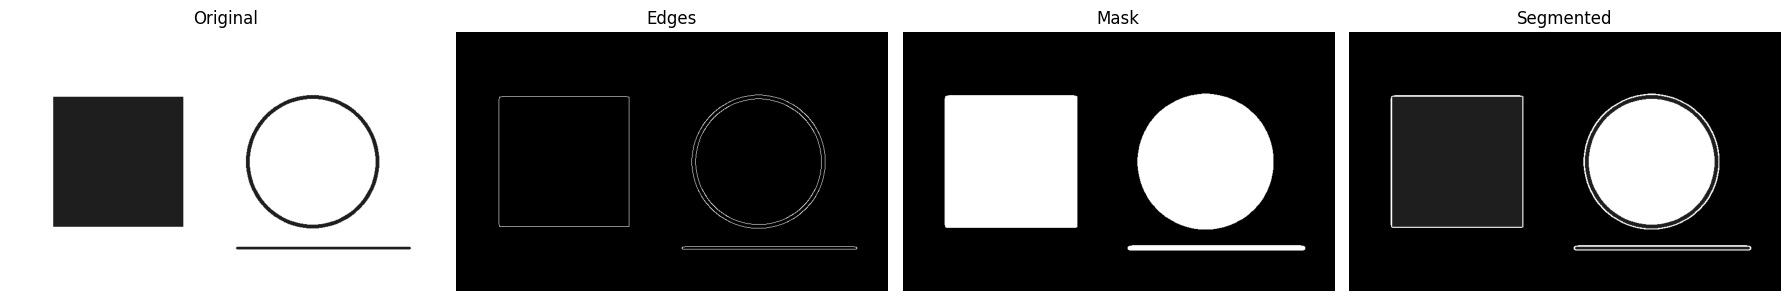

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = "./2_1_test.png"
img = cv2.imread(IMAGE_PATH)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sigma = 1.2
k = int(6 * sigma + 1)
k = k + 1 if k % 2 == 0 else k
blur = cv2.GaussianBlur(gray, (k, k), sigmaX=sigma, sigmaY=sigma)

low, high = 50, 150
edges = cv2.Canny(blur, low, high)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
edges_dilate = cv2.dilate(edges, kernel, iterations=1)
edges_close = cv2.morphologyEx(edges_dilate, cv2.MORPH_CLOSE, kernel, iterations=2)

contours, _ = cv2.findContours(edges_close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 800
kept = [c for c in contours if cv2.contourArea(c) >= min_area]

mask = np.zeros_like(edges_close)
cv2.drawContours(mask, kept, -1, 255, thickness=cv2.FILLED)

segmented = cv2.bitwise_and(img, img, mask=mask)

overlay = img.copy()
cv2.drawContours(overlay, kept, -1, (0, 255, 0), 2)

plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis("off"); plt.title("Original")
plt.subplot(1, 4, 2); plt.imshow(edges, cmap="gray"); plt.axis("off"); plt.title("Edges")
plt.subplot(1, 4, 3); plt.imshow(mask, cmap="gray"); plt.axis("off"); plt.title("Mask")
plt.subplot(1, 4, 4); plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)); plt.axis("off"); plt.title("Segmented")
plt.tight_layout()
plt.show()
